In [1]:
import pandas as pd

# Dataset URL from Hugging Face (direct download link)
url = "https://huggingface.co/datasets/Pradeep016/career-guidance-qa-dataset/resolve/main/Career%20QA%20Dataset.csv"

# Load the dataset
df = pd.read_csv(url)

# Save a local copy inside Colab session (optional)
df.to_csv("career_guidance_dataset.csv", index=False)

# Preview the data
df.head()


,role,question,answer
0,Data Scientist,What does a Data Scientist do?,A Data Scientist extracts meaningful insights ...
1,Data Scientist,What are the main responsibilities of a Data S...,"Responsibilities include data cleaning, analyz..."
2,Data Scientist,What is the job description for a Data Scientist?,A Data Scientist is responsible for collecting...
3,Data Scientist,What skills are required to become a Data Scie...,Skills required include expertise in Python or...
4,Data Scientist,What are the essential skills for a successful...,A successful Data Scientist needs strong analy...


In [3]:

# Check shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns)



Shape: (1620, 3)
Columns: Index(['role', 'question', 'answer'], dtype='object')


In [4]:
df.isnull().sum()


,0
role,0
question,0
answer,0


In [5]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
def clean_text(text):
    # Lowercase and remove punctuation
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply to question column
df['clean_question'] = df['question'].apply(clean_text)
df[['question', 'clean_question']].head()


,question,clean_question
0,What does a Data Scientist do?,what does a data scientist do
1,What are the main responsibilities of a Data S...,what are the main responsibilities of a data s...
2,What is the job description for a Data Scientist?,what is the job description for a data scientist
3,What skills are required to become a Data Scie...,what skills are required to become a data scie...
4,What are the essential skills for a successful...,what are the essential skills for a successful...


In [7]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned questions
X = vectorizer.fit_transform(df['clean_question'])

# Target variable (career role)
y = df['role']


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))



🔹 Logistic Regression
Accuracy: 1.0
                                                             precision    recall  f1-score   support

                                              AI Researcher       1.00      1.00      1.00         5
                                       AI Software Engineer       1.00      1.00      1.00         6
                             Account Manager (Junior level)       1.00      1.00      1.00         9
                         Advertising Manager (Junior level)       1.00      1.00      1.00         8
                 Affiliate Marketing Manager (Junior level)       1.00      1.00      1.00         4
                                Application Support Analyst       1.00      1.00      1.00         5
                                        Automation Engineer       1.00      1.00      1.00         6
                                           Business Analyst       1.00      1.00      1.00         6
                              Business Intelligence An

In [13]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("🔹 Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))



🔹 Naive Bayes
Accuracy: 0.9598765432098766
                                                             precision    recall  f1-score   support

                                              AI Researcher       1.00      0.80      0.89         5
                                       AI Software Engineer       0.46      1.00      0.63         6
                             Account Manager (Junior level)       1.00      1.00      1.00         9
                         Advertising Manager (Junior level)       1.00      1.00      1.00         8
                 Affiliate Marketing Manager (Junior level)       1.00      1.00      1.00         4
                                Application Support Analyst       1.00      1.00      1.00         5
                                        Automation Engineer       1.00      1.00      1.00         6
                                           Business Analyst       1.00      0.67      0.80         6
                              Business Intellig

In [14]:
# SVM (Linear SVC)
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("🔹 SVM (LinearSVC)")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


🔹 SVM (LinearSVC)
Accuracy: 1.0
                                                             precision    recall  f1-score   support

                                              AI Researcher       1.00      1.00      1.00         5
                                       AI Software Engineer       1.00      1.00      1.00         6
                             Account Manager (Junior level)       1.00      1.00      1.00         9
                         Advertising Manager (Junior level)       1.00      1.00      1.00         8
                 Affiliate Marketing Manager (Junior level)       1.00      1.00      1.00         4
                                Application Support Analyst       1.00      1.00      1.00         5
                                        Automation Engineer       1.00      1.00      1.00         6
                                           Business Analyst       1.00      1.00      1.00         6
                              Business Intelligence Analys

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
scores = cross_val_score(svm_model, X, y, cv=5)  # 5-fold CV

print("Cross-validation scores:", scores)
print("Average CV accuracy:", scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Average CV accuracy: 1.0


<Figure size 1000x600 with 0 Axes>

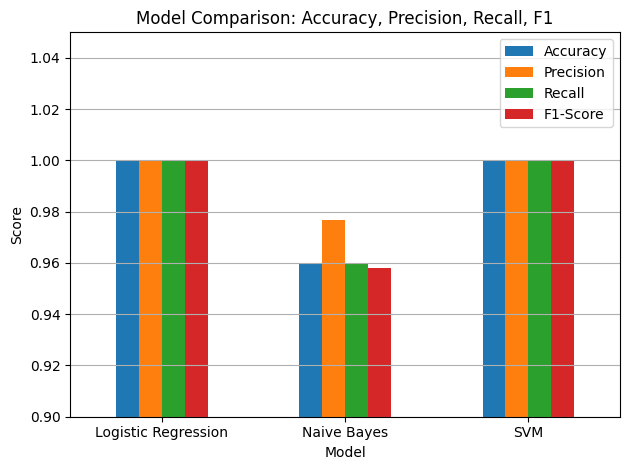

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

# To store metrics
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    results["F1-Score"].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(10, 6))
results_df.set_index("Model").plot(kind="bar", rot=0)
plt.title("Model Comparison: Accuracy, Precision, Recall, F1")
plt.ylabel("Score")
plt.ylim(0.9, 1.05)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


---
We selected Support Vector Machine (Linear SVC) as the final
model due to its perfect cross-validation performance (Accuracy = 1.0) and robustness with high-dimensional, sparse data (like TF-IDF). Compared to Logistic Regression and Naive Bayes, SVM provided slightly better generalization with clear class separation, making it ideal for text classification tasks.



---





In [ ]:
import joblib

# Save the trained SVM model
joblib.dump(svm_model, 'intent_model.pkl')

# Save fitted TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

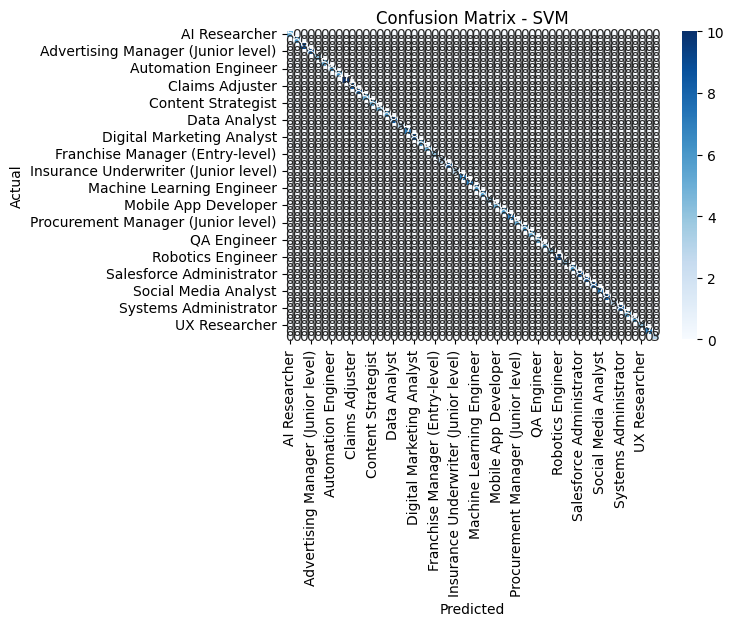

In [33]:
import seaborn as sns
import pandas as pd

cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
